# Initial setup

### Setup

In [54]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import numpy as np
from matplotlib import pyplot as plt
import pprint
import datetime
%matplotlib inline

### Import and clean data

In [510]:
# Import voting, sex and race
def dash_convert(value):
    if value == '-':
        return 0
    return value

def float_convert(value):
    if value == '-':
        return float(0)
    return float(value)

converter = {'Total Population': dash_convert, 
             'Total Citizen Population': dash_convert,
             'Total registered': dash_convert,
             'Percent registered\n(Total)': dash_convert,
             'Percent registered\n(Citizen)': dash_convert,
             'Total voted': dash_convert,
             'Percent voted\n(Total)': dash_convert,
             'Percent voted\n(Citizen)': dash_convert}

raw_votesexrace_12 = pd.read_excel('data/all_data.xlsx', sheet_name='vote_sex_race2012', na_values="(B)", converters=converter)
raw_votesexrace_16 = pd.read_excel('data/all_data.xlsx', sheet_name='vote_sex_race2016', na_values=["(B)"], converters=converter)

# Clean column names
raw_votesexrace_12.columns = raw_votesexrace_12.columns.str.lower().str.replace(' ', '_').str.replace(',', '').str.replace('(', '_').str.replace(')', '').str.replace('.','_').str.replace('\n','_').str.replace('__','_').str.replace('-','_')
raw_votesexrace_16.columns = raw_votesexrace_16.columns.str.lower().str.replace(' ', '_').str.replace(',', '').str.replace('(', '_').str.replace(')', '').str.replace('.','_').str.replace('\n','_').str.replace('__','_').str.replace('-','_')
raw_votesexrace_12.rename(columns={'race_and_hispanic_origin': raw_votesexrace_16.columns[1]}, inplace=True)

# Fix percent column types
percent_cols = ['percent_registered_total', 'percent_registered_citizen', 'percent_registered_citizen', 'percent_voted_total', 'percent_voted_citizen']
raw_votesexrace_12[percent_cols] = raw_votesexrace_12[percent_cols].apply(pd.to_numeric)
raw_votesexrace_16[percent_cols] = raw_votesexrace_16[percent_cols].apply(pd.to_numeric)

# Delete columns that won't be used
del(raw_votesexrace_12['margin_of_error'])
del(raw_votesexrace_12['margin_of_error_1'])
del(raw_votesexrace_12['margin_of_error_2'])
del(raw_votesexrace_12['margin_of_error_3'])

del(raw_votesexrace_16['margin_of_error'])
del(raw_votesexrace_16['margin_of_error_1'])
del(raw_votesexrace_16['margin_of_error_2'])
del(raw_votesexrace_16['margin_of_error_3'])

In [511]:
print('Dimensions 2012:', raw_votesexrace_12.shape, '\t Dimensions 2016', raw_votesexrace_16.shape)
print('Same data types in 2012 and 2016:', raw_votesexrace_12.dtypes.equals(raw_votesexrace_16.dtypes))
print('Same column names:', raw_votesexrace_12.columns.equals(raw_votesexrace_16.columns))
print()
print('Data types 2012:')
print(raw_votesexrace_12.dtypes)
print()
print('Data types 2016:')
print(raw_votesexrace_16.dtypes)

Dimensions 2012: (572, 10) 	 Dimensions 2016 (572, 10)
Same data types in 2012 and 2016: True
Same column names: True

Data types 2012:
state                            object
sex_race_and_hispanic_origin     object
total_population                  int64
total_citizen_population          int64
total_registered                  int64
percent_registered_total        float64
percent_registered_citizen      float64
total_voted                       int64
percent_voted_total             float64
percent_voted_citizen           float64
dtype: object

Data types 2016:
state                            object
sex_race_and_hispanic_origin     object
total_population                  int64
total_citizen_population          int64
total_registered                  int64
percent_registered_total        float64
percent_registered_citizen      float64
total_voted                       int64
percent_voted_total             float64
percent_voted_citizen           float64
dtype: object


In [513]:
raw_votesexrace_16.head(15)

,state,sex_race_and_hispanic_origin,total_population,total_citizen_population,total_registered,percent_registered_total,percent_registered_citizen,total_voted,percent_voted_total,percent_voted_citizen
0,US,Total,245502,224059,157596,64.2,70.3,137537,56.0,61.4
1,US,Male,118488,107554,73761,62.3,68.6,63801,53.8,59.3
2,US,Female,127013,116505,83835,66.0,72.0,73735,58.1,63.3
3,US,White alone,192129,177865,127463,66.3,71.7,111891,58.2,62.9
4,US,White non-Hispanic alone,157395,154450,114151,72.5,73.9,100849,64.1,65.3
5,US,Black alone,30608,28808,19984,65.3,69.4,17119,55.9,59.4
6,US,Asian alone,14881,10283,5785,38.9,56.3,5043,33.9,49.0
7,US,Hispanic (of any race),38990,26662,15267,39.2,57.3,12682,32.5,47.6
8,US,White alone or in combination,195716,181268,129664,66.3,71.5,113707,58.1,62.7
9,US,Black alone or in combination,32211,30326,20935,65.0,69.0,17875,55.5,58.9


In [515]:
# Validate if column names are equal
print("Same columns in raw_votesexrace 2012 and 2016:", raw_votesexrace_12.columns.equals(raw_votesexrace_16.columns))

Same columns in raw_votesexrace 2012 and 2016: True


In [518]:
# Add year column
raw_votesexrace_12['year'] = 2012
raw_votesexrace_16['year'] = 2016

# Concatenate 2012 and 2016
df_vote_sex_race = pd.concat([raw_votesexrace_12, raw_votesexrace_16])
# del(df_vote_sex_race['sex_race_and_hispanic_origin'])
# print(df_vote_sex_race.columns)
# print(df_vote_sex_race.head())

In [519]:
df_vote_sex_race.to_csv('data/df_vote_sex_race.csv')

### Dataframes for analysis

Import elections

In [41]:
df_elections = pd.read_csv('data/df_elections.csv', index_col=0, parse_dates=['general_election_date'])

red_blue_list = ['FLORIDA', 'IOWA', 'MICHIGAN', 'OHIO', 'PENNSYLVANIA', 'WISCONSIN']
df_elections['blue_to_red'] = df_elections.state.apply(lambda x: 'BTR' if x.upper() in red_blue_list else 'Other')

df16_elections = df_elections.copy()[df_elections.general_election_date.dt.year == int(2016)]
print(df_elections.shape[0], df16_elections.shape[0])
print(df16_elections.general_election_date.unique())

1306 826
['2016-11-08T00:00:00.000000000']


In [42]:
df_elections.dtypes

state                            object
state_abbreviation               object
general_election_date    datetime64[ns]
last_name__first                 object
party                            object
general_results                   int64
general_perc                    float64
winner_indicator                 object
party2                           object
blue_to_red                      object
dtype: object

Import voting, sex and race

In [9]:
col_names = list(pd.read_csv('data/df_vote_sex_race.csv', index_col=0).columns)
# Fix column names
col_names[1] = 'sex_race'
df = pd.read_csv('data/df_vote_sex_race.csv', index_col=0)
df.columns = col_names

# Fix all==US state
all_rows = df.state == 'All'
df.loc[all_rows, 'state'] = 'US'

# Fix race labels
df.sex_race = df.sex_race.str.replace('.', '')

# Create blue_to_red variable
red_blue_list = ['FLORIDA', 'IOWA', 'MICHIGAN', 'OHIO', 'PENNSYLVANIA', 'WISCONSIN']
df['blue_to_red'] = df.state.apply(lambda x: 'BTR' if x in red_blue_list else 'Other')

# Population percent variable
df['population_perc'] = df.apply(lambda x: 100 * (x['total_population'] / df[(df.state == x.state) & (df.year == x.year) & (df.sex_race == 'Total')]['total_population'].sum()), axis='columns')

In [10]:
# State
df_state = df[(df.state != 'US') & (df.sex_race == 'Total')]
df_state16 = df_state[df_state.year == 2016]

# Gender
df_gender = df[(df.state != 'US') & ((df.sex_race == 'Female') | (df.sex_race == 'Male'))]
df_gender16 = df_gender[df_gender.year == 2016]

# Race
df_race = df.copy()[(df.state != 'US') & (df.sex_race != 'Total') & (df.sex_race != 'Female') & (df.sex_race != 'Male')]
race_unique = {
    'White alone': 'White', 'White non-Hispanic alone': 'White', 'White alone or in combination': 'White',
    'Black alone': 'Black', 'Black alone or in combination': 'Black',
    'Asian alone': 'Asian', 'Asian alone or in combination': 'Asian',
    'Hispanic (of any race)': 'Hispanic'
}
df_race['race_grouped'] = df_race.sex_race.apply(lambda x: race_unique[x])
df_race16 = df_race.copy()[df_race.year == 2016]

In [6]:
df[(df.state == "US") & (df.year == 2012)].sort_values('percent_voted_total', ascending=False)

,state,sex_race,total_population,total_citizen_population,total_registered,percent_registered_total,percent_registered_citizen,total_voted,percent_voted_total,percent_voted_citizen,year,blue_to_red,population_perc
4,US,White non-Hispanic alone,155615,152862,112706,72.4,73.7,98041,63.0,64.1,2012,Other,66.1
5,US,Black alone,28709,26915,19680,68.5,73.1,17813,62.0,66.2,2012,Other,12.2
9,US,Black alone or in combination,30043,28153,20557,68.4,73.0,18558,61.8,65.9,2012,Other,12.8
2,US,Female,122005,112059,81743,67.0,72.9,71397,58.5,63.7,2012,Other,51.9
3,US,White alone,187084,173466,124697,66.7,71.9,107846,57.6,62.2,2012,Other,79.5
8,US,White alone or in combination,190396,176612,126822,66.6,71.8,109603,57.6,62.1,2012,Other,80.9
0,US,Total,235248,215081,153157,65.1,71.2,132948,56.5,61.8,2012,Other,100.0
1,US,Male,113243,103022,71414,63.1,69.3,61551,54.4,59.7,2012,Other,48.1
10,US,Asian alone or in combination,13335,9033,5173,38.8,57.3,4331,32.5,47.9,2012,Other,5.7
7,US,Hispanic (of any race),35204,23329,13697,38.9,58.7,11188,31.8,48.0,2012,Other,15.0


### Exploratory analysis

In [539]:
df.shape

(1144, 12)

In [7]:
cols = df.columns
cols

Index(['state', 'sex_race', 'total_population', 'total_citizen_population',
       'total_registered', 'percent_registered_total',
       'percent_registered_citizen', 'total_voted', 'percent_voted_total',
       'percent_voted_citizen', 'year', 'blue_to_red', 'population_perc'],
      dtype='object')

In [540]:
df.head(15)

,state,sex_race,total_population,total_citizen_population,total_registered,percent_registered_total,percent_registered_citizen,total_voted,percent_voted_total,percent_voted_citizen,year,blue_to_red
0,US,Total,235248,215081,153157,65.1,71.2,132948,56.5,61.8,2012,Other
1,US,Male,113243,103022,71414,63.1,69.3,61551,54.4,59.7,2012,Other
2,US,Female,122005,112059,81743,67.0,72.9,71397,58.5,63.7,2012,Other
3,US,White alone,187084,173466,124697,66.7,71.9,107846,57.6,62.2,2012,Other
4,US,White non-Hispanic alone,155615,152862,112706,72.4,73.7,98041,63.0,64.1,2012,Other
5,US,Black alone,28709,26915,19680,68.5,73.1,17813,62.0,66.2,2012,Other
6,US,Asian alone,12493,8254,4649,37.2,56.3,3904,31.3,47.3,2012,Other
7,US,Hispanic (of any race),35204,23329,13697,38.9,58.7,11188,31.8,48.0,2012,Other
8,US,White alone or in combination,190396,176612,126822,66.6,71.8,109603,57.6,62.1,2012,Other
9,US,Black alone or in combination,30043,28153,20557,68.4,73.0,18558,61.8,65.9,2012,Other


#### State

In [545]:
print("Unique states:", len(df_state.state.unique()))
df_state.state.unique()

Unique states: 51


array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

#### Sex and race

In [551]:
df.sex_race.describe()

count                         1144
unique                          11
top       White non-Hispanic alone
freq                           104
Name: sex_race, dtype: object

In [552]:
df.sex_race.unique()

array(['Total', 'Male', 'Female', 'White alone',
       'White non-Hispanic alone', 'Black alone', 'Asian alone',
       'Hispanic (of any race)', 'White alone or in combination',
       'Black alone or in combination', 'Asian alone or in combination'],
      dtype=object)

#### Rest of variables

Descriptive statistics - general

In [554]:
df_state.loc[:,'total_population':'percent_voted_citizen'].describe()

,total_population,total_citizen_population,total_registered,percent_registered_total,percent_registered_citizen,total_voted,percent_voted_total,percent_voted_citizen
count,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0
mean,"4,713.2","4,305.3","3,046.6",67.6,71.9,"2,651.8",58.9,62.7
std,"5,331.4","4,569.5","3,068.6",5.9,4.8,"2,667.4",6.1,5.7
min,427.0,419.0,268.0,49.8,54.4,247.0,43.3,47.3
25%,"1,260.8","1,186.5",847.8,64.3,68.8,716.2,55.3,59.2
50%,"3,306.0","3,216.5","2,278.0",68.1,72.1,"1,919.5",59.2,62.5
75%,"5,338.0","4,943.2","3,734.2",71.6,74.6,"3,365.2",62.5,66.3
max,"29,894.0","24,890.0","16,096.0",82.8,84.2,"14,416.0",73.3,75.9


# Analysis

### Questions

1. What happened in 2016?
1. How do blue-to-red (BTR) states look like?
1. How were BTR states different than the rest in 2016?
1. What changed in BTR states between 2012 and 2016?

### What happened in 2016?

#### Popular vote

In [11]:
df16_elections.general_election_date.unique()

array(['2016-11-08T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0,0.5,'Number of votes')

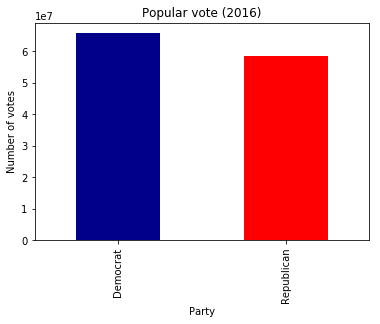

In [86]:
df16_elections = df16_elections[df16_elections.party.isin(['DEM', 'REP'])]

df16_elections.groupby('party2').general_results.apply(np.sum).sort_values(ascending=False).plot(kind='bar', color=['DarkBlue', 'Red'])
plt.title('Popular vote (2016)')
plt.xlabel('Party')
plt.ylabel('Number of votes')

#### Electoral college

In [64]:
# Get electoral college data
elect_college = pd.read_html("https://www.archives.gov/federal-register/electoral-college/allocation.html")[0][[0, 1]].iloc[8:59]
elect_college.columns = ['state', 'electoral_votes']
elect_college.reset_index(inplace=True)
state_votes = {}
for row in elect_college.itertuples():
    state_votes[row.state] = int(row.electoral_votes)

# Add electoral college votes
df16_elections['electoral_votes'] = df16_elections.apply(lambda x: state_votes[x.state] if x.winner_indicator == 'Yes' else 0 , axis='columns')

party2
Republican    305
Democrat      233
Name: electoral_votes, dtype: int64


Text(0,0.5,'Number of votes')

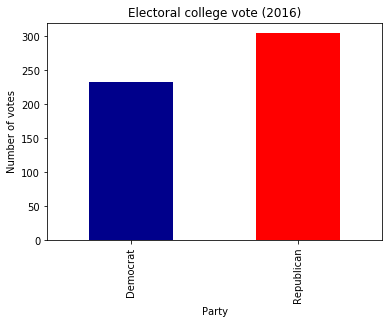

In [85]:
print(df16_elections.groupby('party2').electoral_votes.sum().sort_values(ascending=False))
df16_elections.groupby('party2').electoral_votes.sum().plot(kind='bar', color=['DarkBlue', 'Red'])
plt.title('Electoral college vote (2016)')
plt.xlabel('Party')
plt.ylabel('Number of votes')

**Note**: something's off with this one. Wikipedia entry for 2016 elections reports 304-227 = 531. But, another entry says there is 538, which is what I got (305 + 233 

#### Which states made the difference?

In [18]:
!pip install plotly       # Run only if plotly is not installed already

In [19]:
import plotly
plotly.tools.set_credentials_file(username='ramirocadavid', api_key='2IhWDA4l7BUMjuYgnpCx')

In [20]:
import plotly.plotly as py

df = df16_elections

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(169,169,169)'], [1.0, 'rgb(139,0,0)']]

df['text'] = df['state']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        showscale=False,
        locations = df['state_abbreviation'],
        z = df['blue_to_red'].apply(lambda x: 1 if x == 'BTR' else 0).astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Blue to red"
        )
    ) ]

layout = dict(
        title = '2016 General Election <br> Blue-to-Red States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = py.plot( fig, filename='btr-cloropleth-map' )

![Blue to red states - map](btr-cloropleth-map.png)

Popular vote in Blue-to-red-States

party2
Democrat      14130624
Republican    14915434
Name: general_results, dtype: int64

Difference in votes (Rep - Dem) 784810.0
Percentage difference in votes - State 2.701950123490079
Percentage difference in votes - US 0.6315828678151564


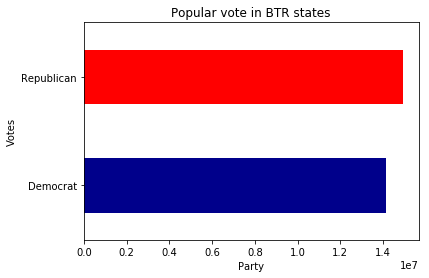

In [121]:
print(df16_elections[df16_elections.blue_to_red == 'BTR'].groupby('party2').general_results.apply(np.sum))
df16_elections[df16_elections.blue_to_red == 'BTR'].groupby('party2').general_results.apply(np.sum).plot(kind='barh', color=['DarkBlue', 'Red'])
plt.title('Popular vote in BTR states')
plt.xlabel('Party')
plt.ylabel('Votes')
print()
diff_vote = 14915434.0 - 14130624
perc_diff_vote = (diff_vote / (14915434.0 + 14130624)) * 100
perc_diff_vote_all = (diff_vote / df16_elections.general_results.sum()) * 100
print('Difference in votes (Rep - Dem)', diff_vote)
print('Percentage difference in votes - State', perc_diff_vote)
print('Percentage difference in votes - US', perc_diff_vote_all)


party2
Democrat       0
Republican    99
Name: electoral_votes, dtype: int64

Difference in votes (Rep - Dem) 784810.0
Electoral votes as percentage of total 18.401486988847584


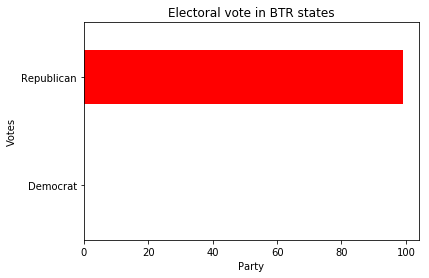

In [125]:
print(df16_elections[df16_elections.blue_to_red == 'BTR'].groupby('party2').electoral_votes.apply(np.sum))
df16_elections[df16_elections.blue_to_red == 'BTR'].groupby('party2').electoral_votes.apply(np.sum).plot(kind='barh', color=['DarkBlue', 'Red'])
plt.title('Electoral vote in BTR states')
plt.xlabel('Party')
plt.ylabel('Votes')
print()
print('Difference in votes (Rep - Dem)', 14915434.0 - 14130624)
print('Electoral votes as percentage of total',\
     (df16_elections[df16_elections.blue_to_red == 'BTR'].electoral_votes.sum()\
     / df16_elections.electoral_votes.sum()) * 100)

### How were BTR states different than the rest in 2016?

#### Aggregate

Number of states

Text(0,0.5,'Number of states')

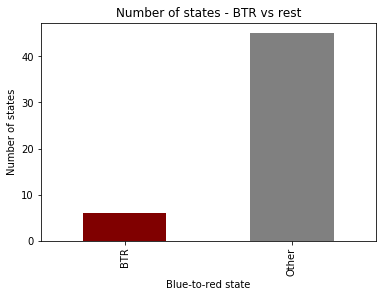

In [189]:
df_state16.groupby('blue_to_red').sex_race.apply(lambda x: x.count()).plot(kind='bar', color=['maroon', 'gray'])
plt.title('Number of states - BTR vs rest')
plt.xlabel('Blue-to-red state')
plt.ylabel('Number of states')

Average population

blue_to_red
BTR     8,246.0
Other   4,356.1
Name: total_population, dtype: float64

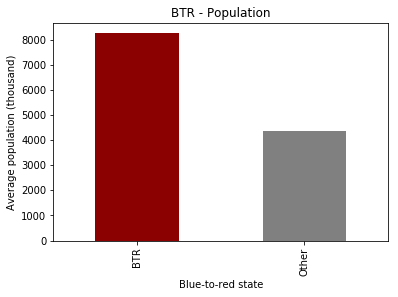

In [150]:
# 2016: BTR vs rest
df_state16.groupby(['blue_to_red']).mean()['total_population'].plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('BTR - Population')
plt.xlabel('Blue-to-red state')
plt.ylabel('Average population (thousand)')
df_state16.groupby(['blue_to_red']).mean()['total_population']

Registered

Text(0,0.5,'Percent registered')

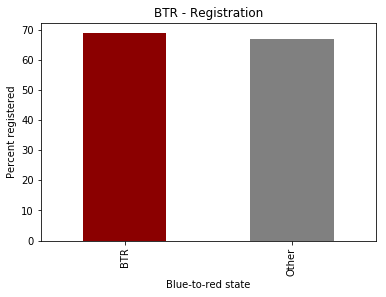

In [152]:
# 2016: BTR vs rest
df_state16.groupby(['blue_to_red']).mean()['percent_registered_total'].plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('BTR - Registration')
plt.xlabel('Blue-to-red state')
plt.ylabel('Percent registered')

Voted

blue_to_red
BTR     60.9
Other   58.3
Name: percent_voted_total, dtype: float64

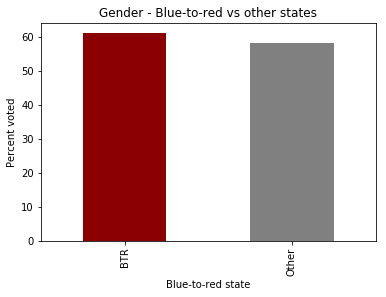

In [153]:
# 2016: BTR vs rest
df_state16.groupby(['blue_to_red']).mean()['percent_voted_total'].plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Gender - Blue-to-red vs other states')
plt.xlabel('Blue-to-red state')
plt.ylabel('Percent voted')

df_state16.groupby(['blue_to_red']).mean()['percent_voted_total']

Total population

#### Gender

Total population

Text(0,0.5,'Percentage of population')

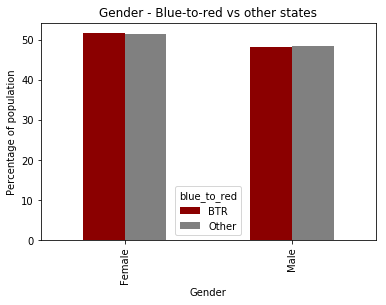

In [154]:
# 2016: BTR vs rest
df_gender16.groupby(['sex_race', 'blue_to_red']).population_perc.mean().unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Gender - Blue-to-red vs other states')
plt.xlabel('Gender')
plt.ylabel('Percentage of population')

Registered population

Text(0,0.5,'Percentage registered')

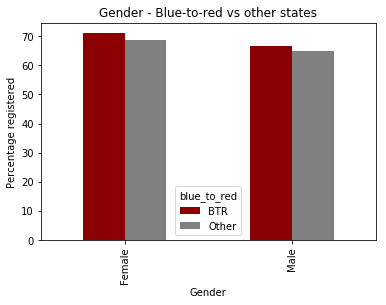

In [155]:
# 2016: BTR vs rest
df_gender16.groupby(['sex_race', 'blue_to_red']).mean()['percent_registered_total'].unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Gender - Blue-to-red vs other states')
plt.xlabel('Gender')
plt.ylabel('Percentage registered')

Voted

blue_to_red,BTR,Other
sex_race,,
Female,63.3,60.4
Male,58.4,56.0


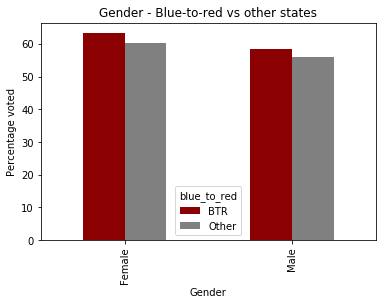

In [156]:
# 2016: BTR vs rest
df_gender16.groupby(['sex_race', 'blue_to_red']).mean()['percent_voted_total'].unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Gender - Blue-to-red vs other states')
plt.xlabel('Gender')
plt.ylabel('Percentage voted')

df_gender16.groupby(['sex_race', 'blue_to_red']).mean()['percent_voted_total'].unstack()

#### Race

Population

Text(0,0.5,'Percentage of population')

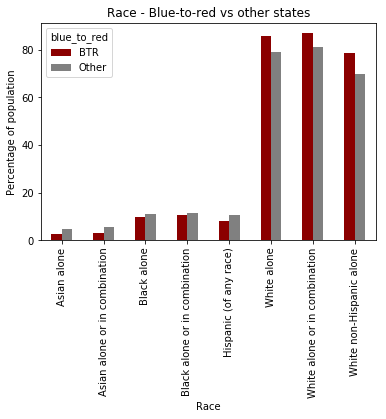

In [157]:
# 2016: BTR vs rest
df_race16.groupby(['sex_race', 'blue_to_red']).population_perc.mean().unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Race - Blue-to-red vs other states')
plt.xlabel('Race')
plt.ylabel('Percentage of population')

Text(0,0.5,'Percentage of population')

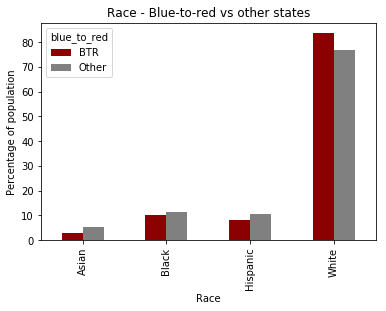

In [158]:
df_race16.groupby(['race_grouped', 'blue_to_red']).population_perc.mean().unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Race - Blue-to-red vs other states')
plt.xlabel('Race')
plt.ylabel('Percentage of population')

Registered

Text(0,0.5,'Percent registered')

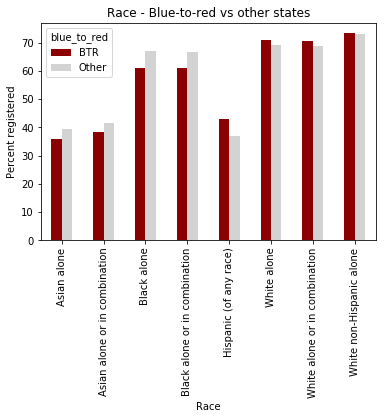

In [144]:
# 2016: BTR vs rest
df_race16.groupby(['sex_race', 'blue_to_red']).percent_registered_total\
.mean().unstack().plot(kind='bar', color=['DarkRed', 'LightGray'])
plt.title('Race - Blue-to-red vs other states')
plt.xlabel('Race')
plt.ylabel('Percent registered')

Text(0,0.5,'Percent registered')

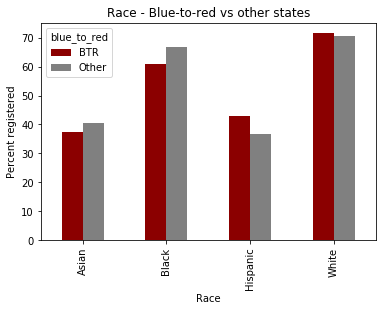

In [159]:
df_race16.groupby(['race_grouped', 'blue_to_red']).percent_registered_total\
.mean().unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Race - Blue-to-red vs other states')
plt.xlabel('Race')
plt.ylabel('Percent registered')

Voted

Text(0,0.5,'Percentage voted')

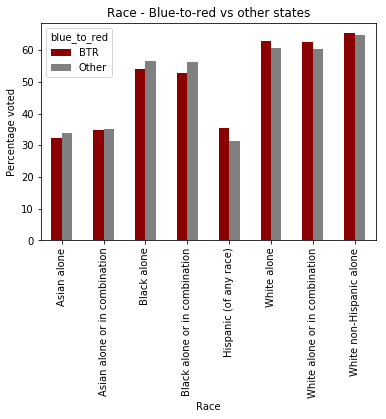

In [160]:
# 2016: BTR vs rest
df_race16.groupby(['sex_race', 'blue_to_red']).percent_voted_total\
.mean().unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Race - Blue-to-red vs other states')
plt.xlabel('Race')
plt.ylabel('Percentage voted')

Text(0,0.5,'Percentage of population')

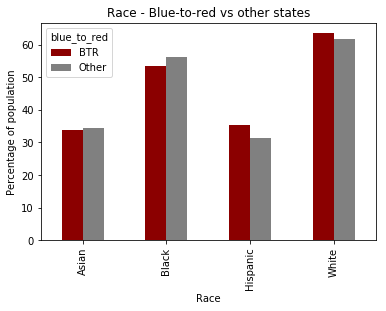

In [162]:
df_race16.groupby(['race_grouped', 'blue_to_red']).percent_voted_total\
.mean().unstack().plot(kind='bar', color=['DarkRed', 'gray'])
plt.title('Race - Blue-to-red vs other states')
plt.xlabel('Race')
plt.ylabel('Percentage of population')

### What changed between 2012 and 2016 in BTR states?

#### Aggregate

Average population

Text(0,0.5,'Average population')

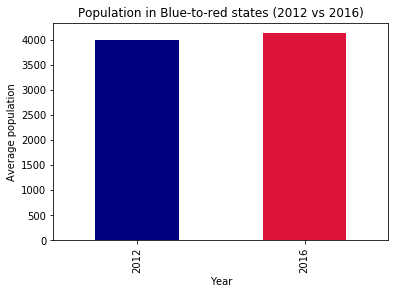

In [165]:
# BTR: 2012 vs 2016
df_gender[df_gender.blue_to_red == 'BTR'].groupby(['year'])['total_population'].mean()\
.plot(kind='bar', color=['navy', 'crimson'])
plt.title('Population in Blue-to-red states (2012 vs 2016)')
plt.xlabel('Year')
plt.ylabel('Average population')

Percent registered

Text(0,0.5,'Percentage registered')

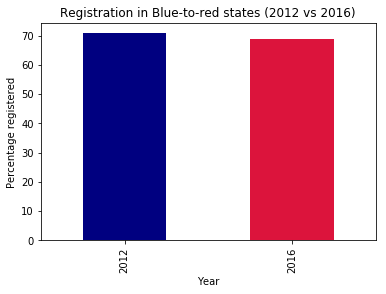

In [166]:
# BTR: 2012 vs 2016
df_gender[df_gender.blue_to_red == 'BTR'].groupby(['year'])['percent_registered_total']\
.mean().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Registration in Blue-to-red states (2012 vs 2016)')
plt.xlabel('Year')
plt.ylabel('Percentage registered')

Percent voted

Text(0,0.5,'Percent voted')

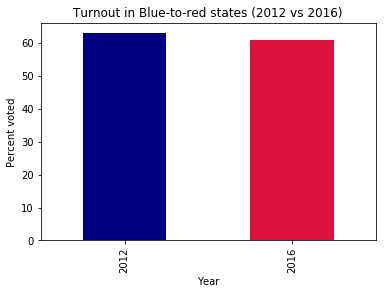

In [167]:
# BTR: 2012 vs 2016
df_gender[df_gender.blue_to_red == 'BTR'].groupby(['year'])['percent_voted_total']\
.mean().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Turnout in Blue-to-red states (2012 vs 2016)')
plt.xlabel('Year')
plt.ylabel('Percent voted')

#### Gender

Population

Text(0,0.5,'Percentage of total population')

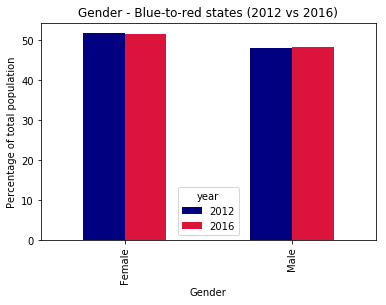

In [168]:
df_gender[df_gender.blue_to_red == 'BTR'].groupby(['sex_race', 'year']).population_perc\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Gender - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Gender')
plt.ylabel('Percentage of total population')

Percent registered

Text(0,0.5,'Percent registered')

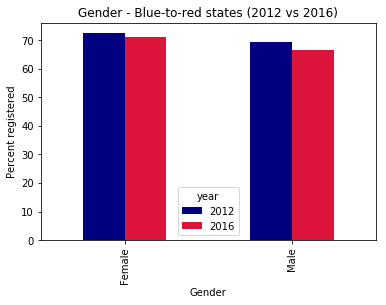

In [169]:
# BTR: 2012 vs 2016
df_gender[df_gender.blue_to_red == 'BTR'].groupby(['sex_race', 'year'])['percent_registered_total']\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Gender - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Gender')
plt.ylabel('Percent registered')

Percent voted

Text(0,0.5,'Percent voted')

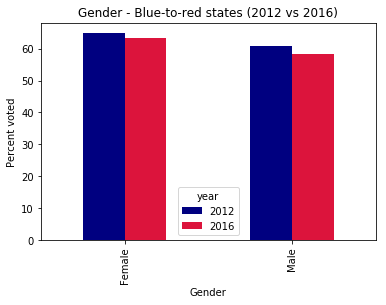

In [170]:
# BTR: 2012 vs 2016
df_gender[df_gender.blue_to_red == 'BTR'].groupby(['sex_race', 'year'])['percent_voted_total'].mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Gender - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Gender')
plt.ylabel('Percent voted')

#### Race

Population

Text(0,0.5,'Percentage of total population')

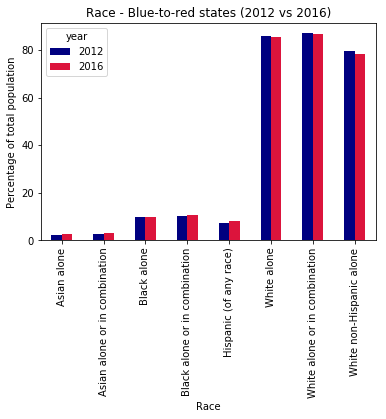

In [171]:
df_race[df_race.blue_to_red == 'BTR'].groupby(['sex_race', 'year']).population_perc\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Race - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Race')
plt.ylabel('Percentage of total population')

Text(0,0.5,'Percentage of total population')

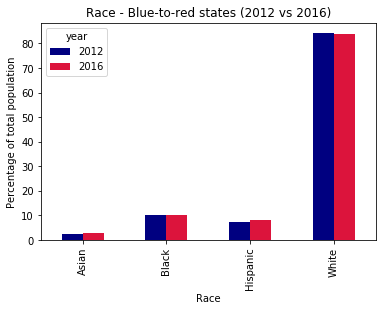

In [172]:
df_race[df_race.blue_to_red == 'BTR'].groupby(['race_grouped', 'year']).population_perc\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Race - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Race')
plt.ylabel('Percentage of total population')

Percent registered

Text(0,0.5,'Percent registered')

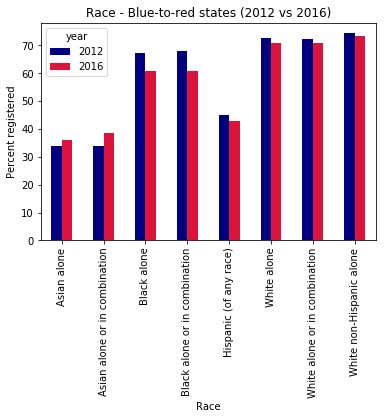

In [173]:
# BTR: 2012 vs 2016
df_race[df_race.blue_to_red == 'BTR'].groupby(['sex_race', 'year'])['percent_registered_total']\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Race - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Race')
plt.ylabel('Percent registered')

Text(0,0.5,'Percent registered')

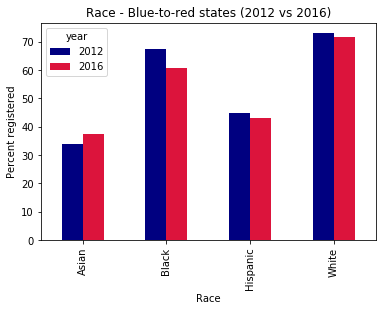

In [174]:
# BTR: 2012 vs 2016
df_race[df_race.blue_to_red == 'BTR'].groupby(['race_grouped', 'year'])['percent_registered_total']\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Race - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Race')
plt.ylabel('Percent registered')

Percent voted

Text(0,0.5,'Percent voted')

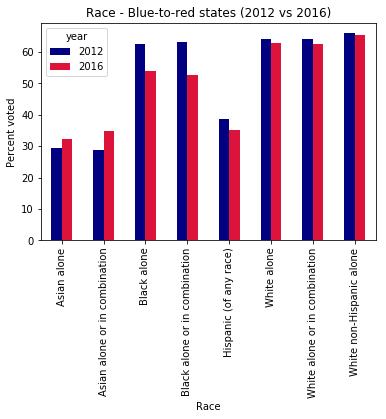

In [175]:
# BTR: 2012 vs 2016
df_race[df_race.blue_to_red == 'BTR'].groupby(['sex_race', 'year'])['percent_voted_total']\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Race - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Race')
plt.ylabel('Percent voted')

year
2012   24.3
2016   18.0
dtype: float64

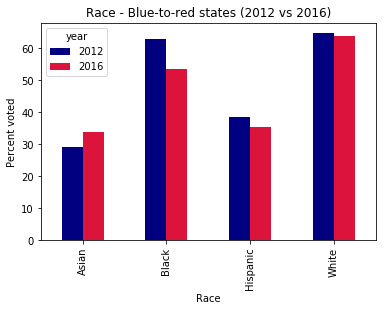

In [184]:
# BTR: 2012 vs 2016
df_race[df_race.blue_to_red == 'BTR'].groupby(['race_grouped', 'year'])['percent_voted_total']\
.mean().unstack().plot(kind='bar', color=['navy', 'crimson'])
plt.title('Race - Blue-to-red states (2012 vs 2016)')
plt.xlabel('Race')
plt.ylabel('Percent voted')

df_race[df_race.blue_to_red == 'BTR'].groupby(['race_grouped', 'year'])['percent_voted_total']\
.mean().unstack().apply(lambda x: (x[1] - x[2]), axis=0)